In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
Churn = pd.read_csv('Churn_Modelling.csv')
Churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Converting Categorical Features

In [3]:
Churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
Churn.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [5]:
Churn = Churn.drop(['RowNumber', 'CustomerId', 'Surname'],axis=1)

In [6]:
Churn.dtypes=='object'

CreditScore        False
Geography           True
Gender              True
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [7]:
Churn.dtypes[Churn.dtypes=='object']

Geography    object
Gender       object
dtype: object

In [8]:
Geo = pd.get_dummies(Churn['Geography'],drop_first=True)
Gender = pd.get_dummies(Churn['Gender'],drop_first=True)

In [9]:
Churn = Churn.drop(['Geography','Gender'],axis=1)

In [10]:
Churn.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,42,2,0.00,1,1,1,101348.88,1
1,608,41,1,83807.86,1,0,1,112542.58,0
2,502,42,8,159660.80,3,1,0,113931.57,1
3,699,39,1,0.00,2,0,0,93826.63,0
4,850,43,2,125510.82,1,1,1,79084.10,0


In [11]:
Churn = pd.concat([Churn,Gender,Geo],axis=1)

In [12]:
Churn.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Male,Germany,Spain
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1


### Standardized Scaler on interger data

In [13]:
Churn.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Male,Germany,Spain
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [19]:
df = Churn.copy()
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Male,Germany,Spain
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [30]:
clm = ((df.dtypes[df.dtypes!="object"]).drop('Exited')).index
clm

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Male', 'Germany', 'Spain'],
      dtype='object')

In [27]:
def Standardize(column):
    column = pd.Series(column)
    column = (column-column.mean())/column.std()
    return column

In [33]:
for clm in clm:
    df[clm]=Standardize(df[clm])

In [34]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Male,Germany,Spain
0,-0.326205,0.293503,-1.041708,-1.225786,-0.911538,0.646059,0.970194,0.021885,1,-1.095933,-0.578707,-0.573780
1,-0.440014,0.198154,-1.387468,0.117344,-0.911538,-1.547691,0.970194,0.216523,0,-1.095933,-0.578707,1.742653
2,-1.536717,0.293503,1.032856,1.332987,2.526930,0.646059,-1.030619,0.240675,1,-1.095933,-0.578707,-0.573780
3,0.501496,0.007456,-1.387468,-1.225786,0.807696,-1.547691,-1.030619,-0.108912,0,-1.095933,-0.578707,-0.573780
4,2.063781,0.388852,-1.041708,0.785689,-0.911538,0.646059,0.970194,-0.365258,0,-1.095933,-0.578707,1.742653


### Split the Data

In [35]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report

In [36]:
X = df.drop('Exited',axis=1)
y = df['Exited']

In [37]:
def Logistic_Kfold(X, y ,k , thrshld=0.5):
    '''
    X =Data Frame of Explanatory varibales
    y =Data Frame of Target variable
    f =number of folds
    threshold = default 0.5
    '''
    kf = KFold(n_splits=k,random_state=1,shuffle=True)
    for train,test in kf.split(df):
        X_train, X_test = X.iloc[train], X.iloc[test]
        y_train, y_test = y.iloc[train], y.iloc[test]
        logmodel = LogisticRegression()
        logmodel.fit(X_train,y_train)
        logical = logmodel.predict_proba(X_test)[:,1]>thrshld
        pred = [0]*np.size(logical)
        for i in np.arange(0,np.size(logical)):
            if logical[i]==True:
                pred[i]=1
        cm = confusion_matrix(y_test,pred)
        print('\n Confusion Matrix: \n',cm)
        cr = classification_report(y_test,pred)
        print('\n classification report: \n ',cr)
        logit_roc_auc = roc_auc_score(y_test,pred)
        print('\n ROC Score: \n',logit_roc_auc)
        print('--'*50)
        
        fpr, tpr, thresholds = roc_curve(y_test,logmodel.predict_proba(X_test)[:,1])
        plt.plot(fpr,tpr ,label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
        plt.plot([0,1],[0,1],'r--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title("Receiver Operating Characteristic")
        plt.legend(loc='lower right')
        plt.grid()
        
    plt.show()
        
    return 


 Confusion Matrix: 
 [[1537   48]
 [ 329   86]]

 classification report: 
                precision    recall  f1-score   support

           0       0.82      0.97      0.89      1585
           1       0.64      0.21      0.31       415

    accuracy                           0.81      2000
   macro avg       0.73      0.59      0.60      2000
weighted avg       0.79      0.81      0.77      2000


 ROC Score: 
 0.5884725019953632
----------------------------------------------------------------------------------------------------

 Confusion Matrix: 
 [[1524   50]
 [ 336   90]]

 classification report: 
                precision    recall  f1-score   support

           0       0.82      0.97      0.89      1574
           1       0.64      0.21      0.32       426

    accuracy                           0.81      2000
   macro avg       0.73      0.59      0.60      2000
weighted avg       0.78      0.81      0.77      2000


 ROC Score: 
 0.5897507024357069
-----------------------

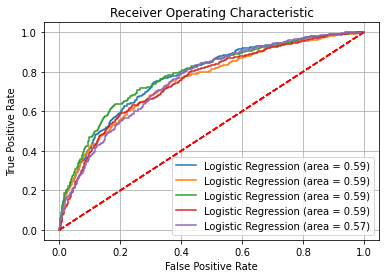

In [38]:
Logistic_Kfold(X=X,y=y,k=5,thrshld=0.5)